In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\shrey\Downloads\training_set (1).csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Missing Values Handling

In [5]:
df.isna().sum()[0:60]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [6]:
def replacer(df):
    for i in df.columns:
        if(df[i].dtypes=="object"):
            x=df[i].mode()[0]
            df[i]=df[i].fillna(x)
        else:
            x=df[i].mean()
            df[i]=df[i].fillna(x)

In [7]:
df['Alley'] = df['Alley'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['PoolQC'] = df['PoolQC'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [8]:
replacer(df)

In [9]:
df.isna().sum()[0:60]

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [10]:
# outliers handling

In [11]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [12]:
len(con)

38

In [13]:
len(cat)

43

In [14]:
df[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [15]:
from scipy.stats import zscore

In [16]:
out = []
for i in con:
    out = out + list(df[(zscore(df[i])>3)|(zscore(df[i])<-3)].index)
    out

In [17]:
outliers = np.unique(out)
len(outliers)

445

In [18]:
df.drop(outliers,axis=0,inplace= True)

In [19]:
df.index= range(0,1015,1)

In [20]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
2,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
3,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
4,11,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1453,180,RM,35.0,3675,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2006,WD,Normal,145000
1011,1454,20,RL,90.0,17217,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Abnorml,84500
1012,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,185000
1013,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000


In [21]:
# EDA

In [22]:
df.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.205026
OverallCond     -0.158932
BsmtFinSF2      -0.098253
MiscVal         -0.070746
MSSubClass      -0.037097
YrSold          -0.026457
Id              -0.024314
LowQualFinSF    -0.020850
3SsnPorch       -0.001348
ScreenPorch      0.017633
MoSold           0.088510
BsmtUnfSF        0.219351
BsmtFullBath     0.231293
HalfBath         0.268377
BedroomAbvGr     0.276780
2ndFlrSF         0.318098
WoodDeckSF       0.330729
BsmtFinSF1       0.350999
LotArea          0.364850
LotFrontage      0.386450
OpenPorchSF      0.391954
MasVnrArea       0.418379
Fireplaces       0.436872
GarageYrBlt      0.556694
YearRemodAdd     0.566916
1stFlrSF         0.593348
TotRmsAbvGrd     0.594391
TotalBsmtSF      0.627239
YearBuilt        0.632075
FullBath         0.669794
GarageArea       0.670352
GarageCars       0.697028
GrLivArea        0.757007
OverallQual      0.813903
SalePrice        1.000000
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePr

In [23]:
Q=pd.DataFrame(df.corr()['SalePrice'].sort_values())
imp_con_columns=Q[(Q['SalePrice']>0.1)|(Q['SalePrice']<-0.1)].index.tolist()
imp_con_columns.remove('SalePrice')

In [24]:
imp_con_columns

['EnclosedPorch',
 'OverallCond',
 'BsmtUnfSF',
 'BsmtFullBath',
 'HalfBath',
 'BedroomAbvGr',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'YearRemodAdd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [25]:
len(cat)

43

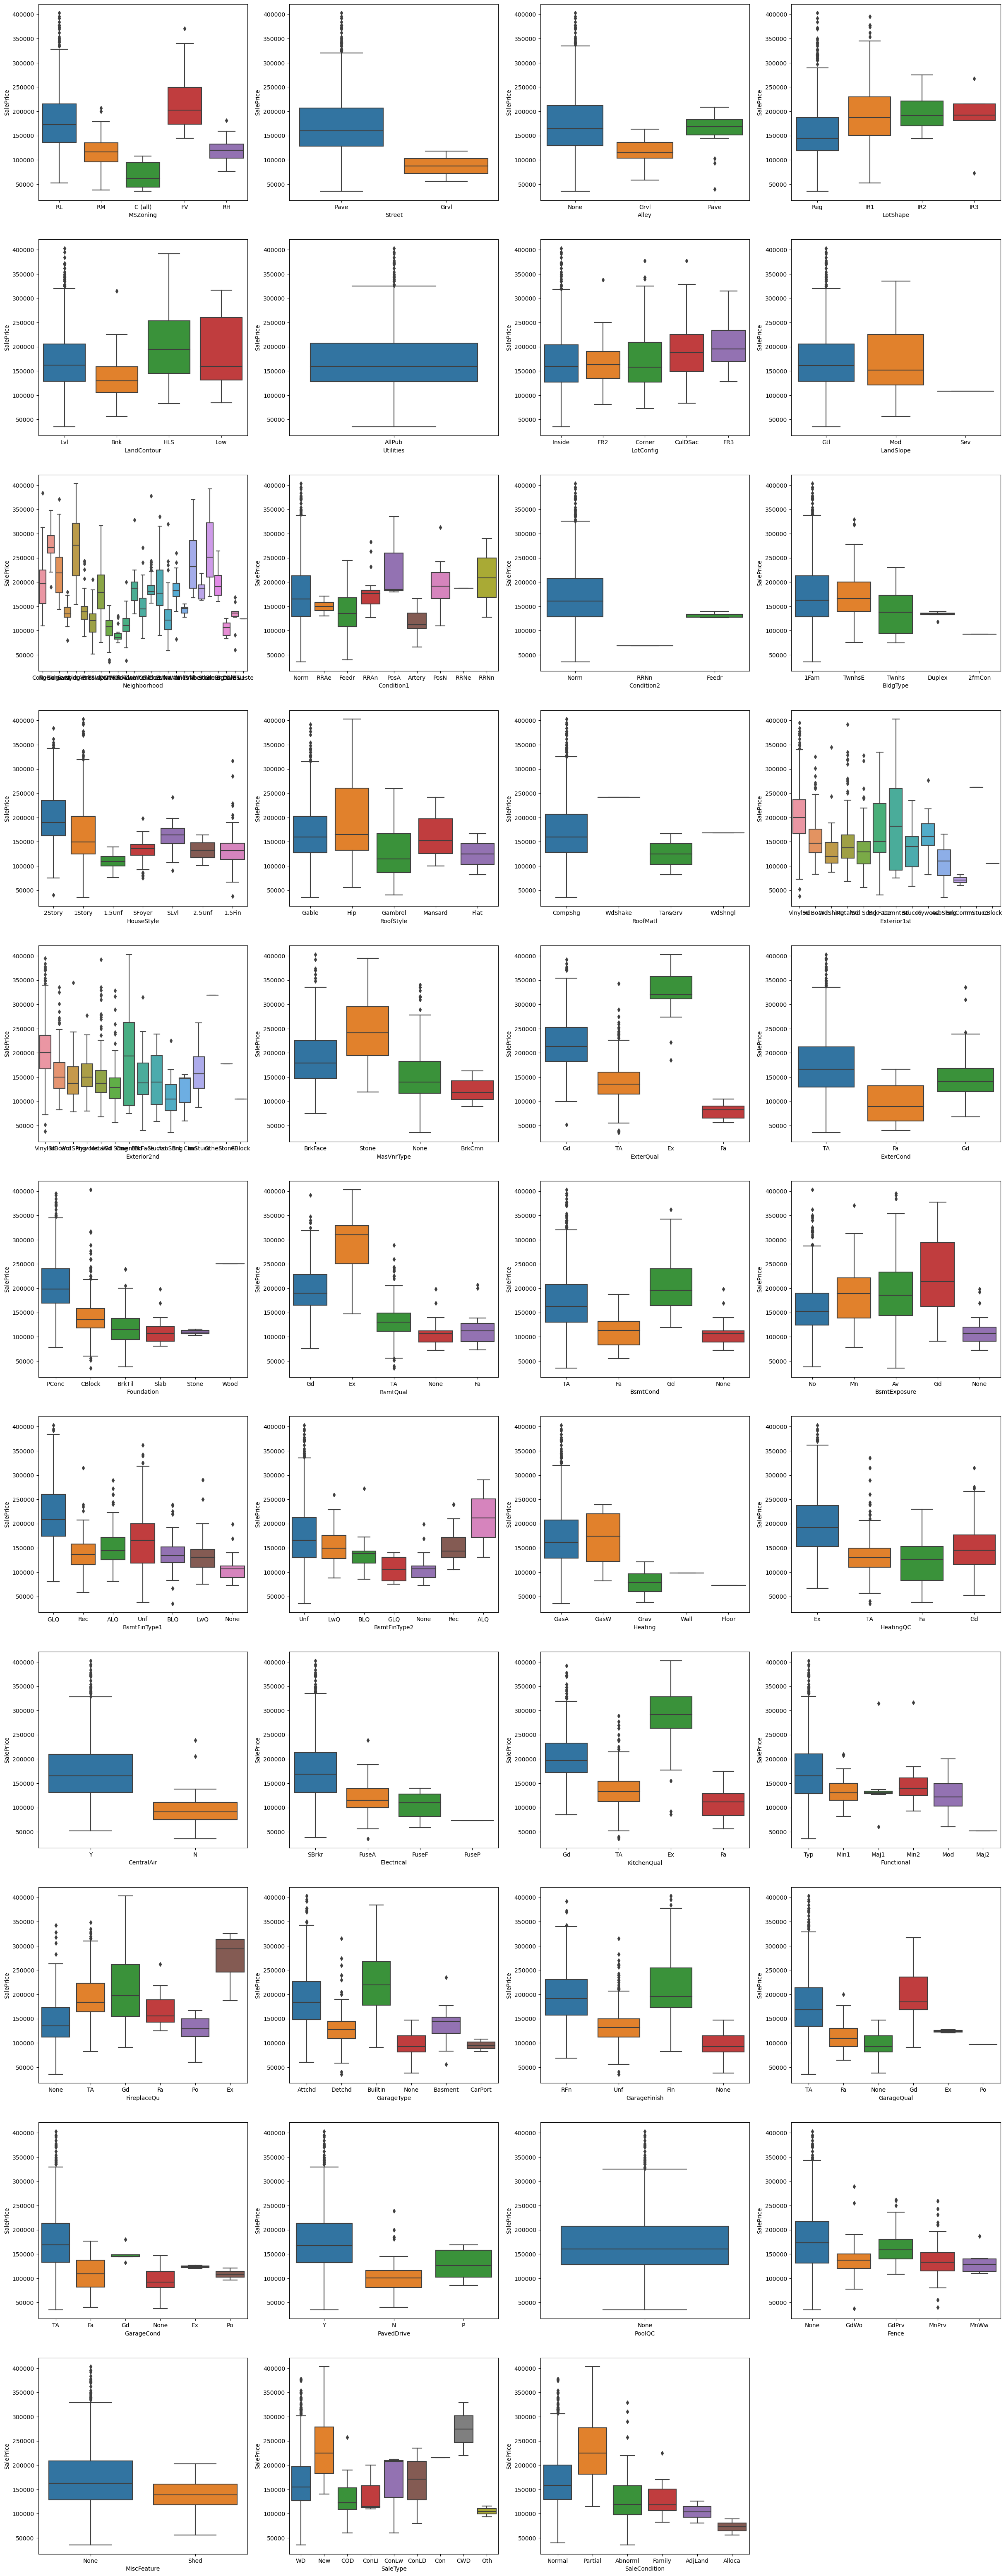

In [26]:
plt.figure(figsize=(30,80))
x=1
for i in cat:
    plt.subplot(11,4,x)
    sns.boxplot(df[i],df['SalePrice'])
    x=x+1

In [27]:
# Considering all the Categorical Columns

In [28]:
# Preproceesing

In [29]:
x=df.drop(['Id','SalePrice'],axis=1)
y=df['SalePrice']

In [30]:
normal_scalar=MinMaxScaler()
array=normal_scalar.fit_transform(x[imp_con_columns])
x1=pd.DataFrame(array,columns=imp_con_columns)
x1

,EnclosedPorch,OverallCond,BsmtUnfSF,BsmtFullBath,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,BsmtFinSF1,LotArea,...,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual
0,0.0,0.4,0.080257,1.0,1.0,0.50,0.598458,0.000000,0.428919,0.249485,...,0.883333,0.236292,0.625,0.396664,0.951613,0.666667,0.520418,0.50,0.500787,0.625
1,0.0,0.4,0.232210,1.0,1.0,0.50,0.606868,0.000000,0.295261,0.347186,...,0.866667,0.272470,0.375,0.426321,0.935484,0.666667,0.577398,0.50,0.530709,0.625
2,0.0,0.4,0.262172,1.0,1.0,0.75,0.737912,0.410256,0.397934,0.452214,...,0.833333,0.399661,0.750,0.530584,0.927419,0.666667,0.793922,0.75,0.692913,0.750
3,0.0,0.4,0.169609,1.0,0.0,0.50,0.000000,0.544872,0.831713,0.306501,...,0.916667,0.710006,0.500,0.781279,0.959677,0.666667,0.603989,0.50,0.494488,0.750
4,0.0,0.4,0.071696,1.0,0.0,0.50,0.000000,0.000000,0.550425,0.345441,...,0.250000,0.340305,0.250,0.481928,0.645161,0.333333,0.364672,0.25,0.237008,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.0,0.4,0.000000,1.0,0.0,0.25,0.000000,0.000000,0.332321,0.082871,...,0.916667,0.358395,0.250,0.253475,0.967742,0.333333,0.498575,0.50,0.249606,0.375
1011,0.0,0.4,0.609952,0.0,0.0,0.50,0.000000,0.076923,0.000000,0.555393,...,0.933333,0.396834,0.375,0.528267,0.975806,0.333333,0.000000,0.00,0.276378,0.375
1012,0.0,0.4,0.433922,1.0,0.0,0.25,0.000000,0.000000,0.249089,0.216337,...,0.916667,0.442623,0.375,0.565802,0.959677,0.666667,0.379867,0.50,0.308268,0.625
1013,0.0,0.4,0.509898,0.0,1.0,0.50,0.486335,0.000000,0.000000,0.230887,...,0.833333,0.291125,0.500,0.441613,0.919355,0.666667,0.436847,0.50,0.475984,0.500


In [31]:
x2=pd.get_dummies(x[cat])
x2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1011,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1012,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1013,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
x_new=x1.join(x2)

In [33]:
x_new

,EnclosedPorch,OverallCond,BsmtUnfSF,BsmtFullBath,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,BsmtFinSF1,LotArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.4,0.080257,1.0,1.0,0.50,0.598458,0.000000,0.428919,0.249485,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.4,0.232210,1.0,1.0,0.50,0.606868,0.000000,0.295261,0.347186,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.4,0.262172,1.0,1.0,0.75,0.737912,0.410256,0.397934,0.452214,...,0,0,0,1,0,0,0,0,1,0
3,0.0,0.4,0.169609,1.0,0.0,0.50,0.000000,0.544872,0.831713,0.306501,...,0,0,0,1,0,0,0,0,1,0
4,0.0,0.4,0.071696,1.0,0.0,0.50,0.000000,0.000000,0.550425,0.345441,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.0,0.4,0.000000,1.0,0.0,0.25,0.000000,0.000000,0.332321,0.082871,...,0,0,0,1,0,0,0,0,1,0
1011,0.0,0.4,0.609952,0.0,0.0,0.50,0.000000,0.076923,0.000000,0.555393,...,0,0,0,1,1,0,0,0,0,0
1012,0.0,0.4,0.433922,1.0,0.0,0.25,0.000000,0.000000,0.249089,0.216337,...,0,0,0,1,0,0,0,0,1,0
1013,0.0,0.4,0.509898,0.0,1.0,0.50,0.486335,0.000000,0.000000,0.230887,...,0,0,0,1,0,0,0,0,1,0


In [34]:
# Splitting the dataset

In [35]:
xtest,xtrain,ytest,ytrain=train_test_split(x_new,y,test_size=0.25,random_state=21)

In [36]:
# featue Selection

In [37]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     25.82
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           4.55e-36
Time:                        13:38:01   Log-Likelihood:                -2652.4
No. Observations:                 254   AIC:                             5665.
Df Residuals:                      74   BIC:                             6301.
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1674.7877   3917.986     -0.427      0.670   -9481.545    6131.970
EnclosedPorch          8648.0532   1.27e+04      0.681      0.498   -1.67e+04     3.4e+04
OverallCond            1.017e+04   1.62e+04      0.629      0.532   -2.21e+04    4.24e+04
BsmtUnfSF              2.331e+04   1.45e+05      0.160      0.873   -2.66e+05    3.13e+05
BsmtFullBath          -1469.0759   6444.172     -0.228      0.820   -1.43e+04    1.14e+04
HalfBath              -6083.2484   9312.423     -0.653      0.516   -2.46e+04    1.25e+04
BedroomAbvGr          -1.484e+04   1.87e+04     -0.792      0.431   -5.22e+04    2.25e+04
2ndFlrSF              -1.358e+05   3.75e+05     -0.362      0.718   -8.83e+05    6.11e+05
WoodDeckSF            -2324.0277   8096.904     -0.287      0.775   -1.85e+04    1.38e+04
BsmtFinSF1             7.318e+04   1.28e+05      0.573      0.568   -1.81e+05    3.28e+05
LotArea               -6.285e+04   3.25e+04     -1.936      0.057   -1.28e+05    1819.927
LotFrontage           -8440.5557    1.9e+04     -0.444      0.658   -4.63e+04    2.94e+04
OpenPorchSF            5444.5191   1.09e+04      0.501      0.618   -1.62e+04    2.71e+04
MasVnrArea             3.605e+04   1.41e+04      2.560      0.013    7984.965    6.41e+04
Fireplaces            -1.021e+04   1.83e+04     -0.556      0.580   -4.68e+04    2.64e+04
GarageYrBlt            3.884e+04   3.14e+04      1.237      0.220   -2.37e+04    1.01e+05
YearRemodAdd           8466.1076   1.61e+04      0.524      0.602   -2.37e+04    4.06e+04
1stFlrSF              -2.481e+05    4.6e+05     -0.540      0.591   -1.16e+06    6.68e+05
TotRmsAbvGrd          -2640.6843   2.21e+04     -0.120      0.905   -4.66e+04    4.13e+04
TotalBsmtSF            5.192e+04   1.64e+05      0.317      0.753   -2.75e+05    3.79e+05
YearBuilt              2.382e+04    4.7e+04      0.506      0.614   -6.99e+04    1.18e+05
FullBath               7854.3421    2.5e+04      0.315      0.754   -4.19e+04    5.76e+04
GarageArea             1.613e+04   2.14e+04      0.754      0.453   -2.65e+04    5.88e+04
GarageCars            -6952.5556   2.64e+04     -0.263      0.793   -5.96e+04    4.57e+04
GrLivArea              4.465e+05   6.66e+05      0.671      0.505    -8.8e+05    1.77e+06
OverallQual            7.142e+04   2.49e+04      2.872      0.005    2.19e+04    1.21e+05
MSZoning_C (all)        1.08e-08   1.87e-08      0.577      0.566   -2.65e-08    4.81e-08
MSZoning_FV            5306.9080   1.18e+04      0.449      0.655   -1.82e+04    2.89e+04
MSZoning_RH           -1.455e+04    1.4e+04     -1.039      0.302   -4.25e+04    1.33e+04
MSZoning_RL            9825.1960   7484.517      1.313      0.193   -5088.029    2.47e+04
MSZoning_RM           -2252.3544   1.26e+04     -0.179      0.858   -2.73e+04    2.28e+04
Street_Grvl           -

In [38]:
ols.pvalues.sort_values().index

Index(['Neighborhood_Crawfor', 'SaleType_CWD', 'OverallQual', 'Functional_Typ',
       'MasVnrArea', 'LotShape_IR1', 'MasVnrType_Stone', 'LotShape_Reg',
       'LotShape_IR3', 'MasVnrType_BrkFace',
       ...
       'Heating_Floor', 'Heating_Wall', 'Electrical_FuseP',
       'GarageType_CarPort', 'GarageQual_Po', 'GarageCond_Po', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleCondition_Alloca'],
      dtype='object', length=263)

In [39]:
ols.rsquared_adj

0.9461208615131472

In [40]:
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9461, 'SaleCondition_Alloca')

In [41]:
x_new = x_new.drop(col_to_drop,axis=1)   # Drop the column '2ndFlrSF'

xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.25,random_state=21)

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9343, 'BldgType_2fmCon')

In [42]:
r = []
for i in range(0,150,1):
    x_new = x_new.drop(col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.25,random_state=21)
    xconst = add_constant(xtrain,has_constant='add')
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if col_to_drop == 'const':
        col_to_drop = ols.pvalues.sort_values().index[-2]
    r.append(rsq)

In [43]:
len(x_new.columns)

111

In [44]:
# Model training

In [45]:
lin_model=LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [46]:
# model evaluation

In [47]:
# testing data evaluation
ypredtest=lin_model.predict(xtest)

m_a_e = mean_absolute_error(ytest,ypredtest)
print('Mae is :',m_a_e)

m_s_e = mean_squared_error(ytest,ypredtest)
print('Mse is :',m_s_e)

r_sq = r2_score(ytest,ypredtest)
print('R_sq:',r_sq)

ad_r_sq=1-((1-r_sq)*(len(xtrain)-1)/(len(xtrain)-len(x_new.columns)-1))
print('Adj r2 is:',ad_r_sq)

Mae is : 14697.535433070867
Mse is : 442657378.37795275
R_sq: 0.8986222100964931
Adj r2 is: 0.8812833276938903


In [48]:
# training data evaluation
ypredtrain =lin_model.predict(xtrain)

m_a_e = mean_absolute_error(ytrain,ypredtrain)
print('Mae is :',m_a_e)

m_s_e = mean_squared_error(ytrain,ypredtrain)
print('Mse is :',m_s_e)

r_sq = r2_score(ytrain,ypredtrain)
print('R_sq:',r_sq)

ad_r_sq=1-((1-r_sq)*(len(xtrain)-1)/(len(xtrain)-len(x_new.columns)-1))
print('Adj r2 is:',ad_r_sq)

Mae is : 9961.762155059132
Mse is : 200301212.0565046
R_sq: 0.9487918180070509
Adj r2 is: 0.9400335619188886


In [49]:
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(xtrain,ytrain)

Ridge()

In [50]:
# testing data evaluation
ypredtest=lin_model.predict(xtest)

m_a_e = mean_absolute_error(ytest,ypredtest)
print('Mae is :',m_a_e)

m_s_e = mean_squared_error(ytest,ypredtest)
print('Mse is :',m_s_e)

r_sq = r2_score(ytest,ypredtest)
print('R_sq:',r_sq)

ad_r_sq=1-((1-r_sq)*(len(xtrain)-1)/(len(xtrain)-len(x_new.columns)-1))
print('Adj r2 is:',ad_r_sq)

Mae is : 14697.535433070867
Mse is : 442657378.37795275
R_sq: 0.8986222100964931
Adj r2 is: 0.8812833276938903


In [51]:
# training data evaluation
ypredtest=lin_model.predict(xtrain)

m_a_e = mean_absolute_error(ytrain,ypredtrain)
print('Mae is :',m_a_e)

m_s_e = mean_squared_error(ytrain,ypredtrain)
print('Mse is :',m_s_e)

r_sq = r2_score(ytrain,ypredtrain)
print('R_sq:',r_sq)

ad_r_sq=1-((1-r_sq)*(len(xtrain)-1)/(len(xtrain)-len(x_new.columns)-1))
print('Adj r2 is:',ad_r_sq)

Mae is : 9961.762155059132
Mse is : 200301212.0565046
R_sq: 0.9487918180070509
Adj r2 is: 0.9400335619188886


In [52]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [53]:
# testing data evaluation
ypredtest=lin_model.predict(xtest)

m_a_e = mean_absolute_error(ytest,ypredtest)
print('Mae is :',m_a_e)

m_s_e = mean_squared_error(ytest,ypredtest)
print('Mse is :',m_s_e)

r_sq = r2_score(ytest,ypredtest)
print('R_sq:',r_sq)

ad_r_sq=1-((1-r_sq)*(len(xtrain)-1)/(len(xtrain)-len(x_new.columns)-1))
print('Adj r2 is:',ad_r_sq)

Mae is : 14697.535433070867
Mse is : 442657378.37795275
R_sq: 0.8986222100964931
Adj r2 is: 0.8812833276938903


In [54]:
# training data evaluation
ypredtest=lin_model.predict(xtrain)

m_a_e = mean_absolute_error(ytrain,ypredtrain)
print('Mae is :',m_a_e)

m_s_e = mean_squared_error(ytrain,ypredtrain)
print('Mse is :',m_s_e)

r_sq = r2_score(ytrain,ypredtrain)
print('R_sq:',r_sq)

ad_r_sq=1-((1-r_sq)*(len(xtrain)-1)/(len(xtrain)-len(x_new.columns)-1))
print('Adj r2 is:',ad_r_sq)

Mae is : 9961.762155059132
Mse is : 200301212.0565046
R_sq: 0.9487918180070509
Adj r2 is: 0.9400335619188886


In [55]:
# Ridge with gridsearch cv

In [56]:
ridge_model = Ridge()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,hyp_grid,cv = 5)

gscv_ridge_model.fit(xtrain,ytrain)

gscv_ridge_model.best_estimator_

Ridge(alpha=0.11)

In [57]:
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [58]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(x_new.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14269.89836327489
Mean_squared_error: 416572072.92113733
R_squared: 0.9045962901533084
Adj_R2: 0.8300201507661059


In [59]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(x_new.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9989.945745383688
Mean_squared_error: 201073213.7310001
R_squared: 0.9485944512420647
Adj_R2: 0.9398024390507999


In [60]:
# lasso with Grid search cv

In [61]:
lasso_model = Lasso()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,hyp_grid,cv = 5)

gscv_lasso_model.fit(xtrain,ytrain)

gscv_lasso_model.best_estimator_

Lasso(alpha=0.9899999999999995)

In [62]:
lasso_model = Lasso(alpha=0.9899999999999995)
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [63]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(x_new.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14528.01191969505
Mean_squared_error: 436633165.98179615
R_squared: 0.9000018806237745
Adj_R2: 0.8218343366043306


In [64]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(x_new.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9905.944765696571
Mean_squared_error: 199745723.0111273
R_squared: 0.9489338320460011
Adj_R2: 0.9401998649537148


In [65]:
# Best performing model
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(x_new,y)

Ridge()

In [66]:
df1=pd.read_csv(r'C:\Users\shrey\Downloads\testing_set (1).csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [67]:
df1['Alley'] = df1['Alley'].fillna('None')
df1['BsmtQual'] = df1['BsmtQual'].fillna('None')
df1['BsmtCond'] = df1['BsmtCond'].fillna('None')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('None')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('None')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('None')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('None')
df1['GarageType'] = df1['GarageType'].fillna('None')
df1['GarageFinish'] = df1['GarageFinish'].fillna('None')
df1['GarageQual'] = df1['GarageQual'].fillna('None')
df1['GarageCond'] = df1['GarageCond'].fillna('None')
df1['PoolQC'] = df1['PoolQC'].fillna('None')
df1['Fence'] = df1['Fence'].fillna('None')
df1['MiscFeature'] = df1['MiscFeature'].fillna('None')

In [68]:
df1.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [69]:
replacer(df1)

In [70]:
df1.isna().sum()[0:60]

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [71]:
cat = []
con = []
for i in df1.columns:
    if df1[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [72]:
len(cat)

43

In [73]:
len(con)

37

In [74]:
out = []
for i in con:
    out = out + list(df1[(zscore(df1[i])>3)|(zscore(df1[i])<-3)].index)
    out

In [75]:
outliers = np.unique(out)
outliers

array([   1,    6,   19,   26,   29,   32,   33,   40,   42,   47,   48,
         51,   53,   57,   63,   65,   66,   69,   70,   72,   75,   76,
         77,   78,   79,   85,   91,   93,   95,   96,   98,   99,  100,
        105,  108,  110,  114,  115,  120,  133,  134,  136,  141,  142,
        143,  145,  146,  153,  158,  159,  161,  162,  163,  169,  176,
        184,  194,  196,  198,  199,  200,  203,  206,  211,  217,  238,
        245,  259,  267,  269,  270,  271,  275,  276,  277,  278,  283,
        288,  290,  291,  293,  294,  295,  301,  304,  305,  306,  310,
        311,  312,  313,  315,  322,  325,  326,  330,  331,  333,  336,
        341,  346,  350,  351,  360,  361,  367,  368,  371,  374,  377,
        378,  379,  380,  383,  384,  385,  386,  387,  396,  397,  398,
        399,  400,  401,  402,  403,  404,  420,  427,  433,  439,  441,
        442,  443,  444,  451,  452,  454,  462,  463,  468,  469,  472,
        485,  487,  491,  492,  495,  498,  500,  5

In [76]:
df1.drop(outliers,axis=0,inplace=True)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2913,160,RM,21.0,1533,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,12,2006,WD,Abnorml
1453,2914,160,RM,21.0,1526,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,None,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml


In [77]:
df1.shape

(1019, 80)

In [78]:
df1.index=range(0,1019,1)

In [79]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
2,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
3,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal
4,1466,60,RL,75.0,10000,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,2913,160,RM,21.0,1533,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,12,2006,WD,Abnorml
1015,2914,160,RM,21.0,1526,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,None,0,6,2006,WD,Normal
1016,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
1017,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml


In [80]:
#EDA

In [81]:
df1.corr()['Id'].sort_values()

YrSold          -0.974103
YearRemodAdd    -0.093793
YearBuilt       -0.082072
OverallQual     -0.080757
GarageCars      -0.078282
FullBath        -0.076145
GarageArea      -0.074786
GarageYrBlt     -0.074462
1stFlrSF        -0.060255
Fireplaces      -0.057172
TotalBsmtSF     -0.055303
LotFrontage     -0.049671
MiscVal         -0.043887
MasVnrArea      -0.038943
GrLivArea       -0.035814
HalfBath        -0.035304
BsmtFinSF1      -0.031321
OpenPorchSF     -0.024969
BsmtFullBath    -0.021086
BsmtUnfSF       -0.018538
LotArea         -0.011316
BsmtFinSF2      -0.005684
OverallCond     -0.005224
BsmtHalfBath    -0.004834
TotRmsAbvGrd    -0.002672
WoodDeckSF      -0.002583
MSSubClass      -0.002169
2ndFlrSF         0.013408
BedroomAbvGr     0.017864
ScreenPorch      0.036214
LowQualFinSF     0.039468
EnclosedPorch    0.042423
MoSold           0.131153
Id               1.000000
KitchenAbvGr          NaN
3SsnPorch             NaN
PoolArea              NaN
Name: Id, dtype: float64

In [83]:
Q1 = pd.DataFrame(df1.corr()['Id'].sort_values())
imp_con_columns1 = Q1[(Q1['Id']>0.1)|(Q1['Id']<-0.1)].index.tolist()
imp_con_columns1.remove('Id')

In [84]:
imp_con_columns1

['YrSold', 'MoSold']

In [85]:
len(cat)

43

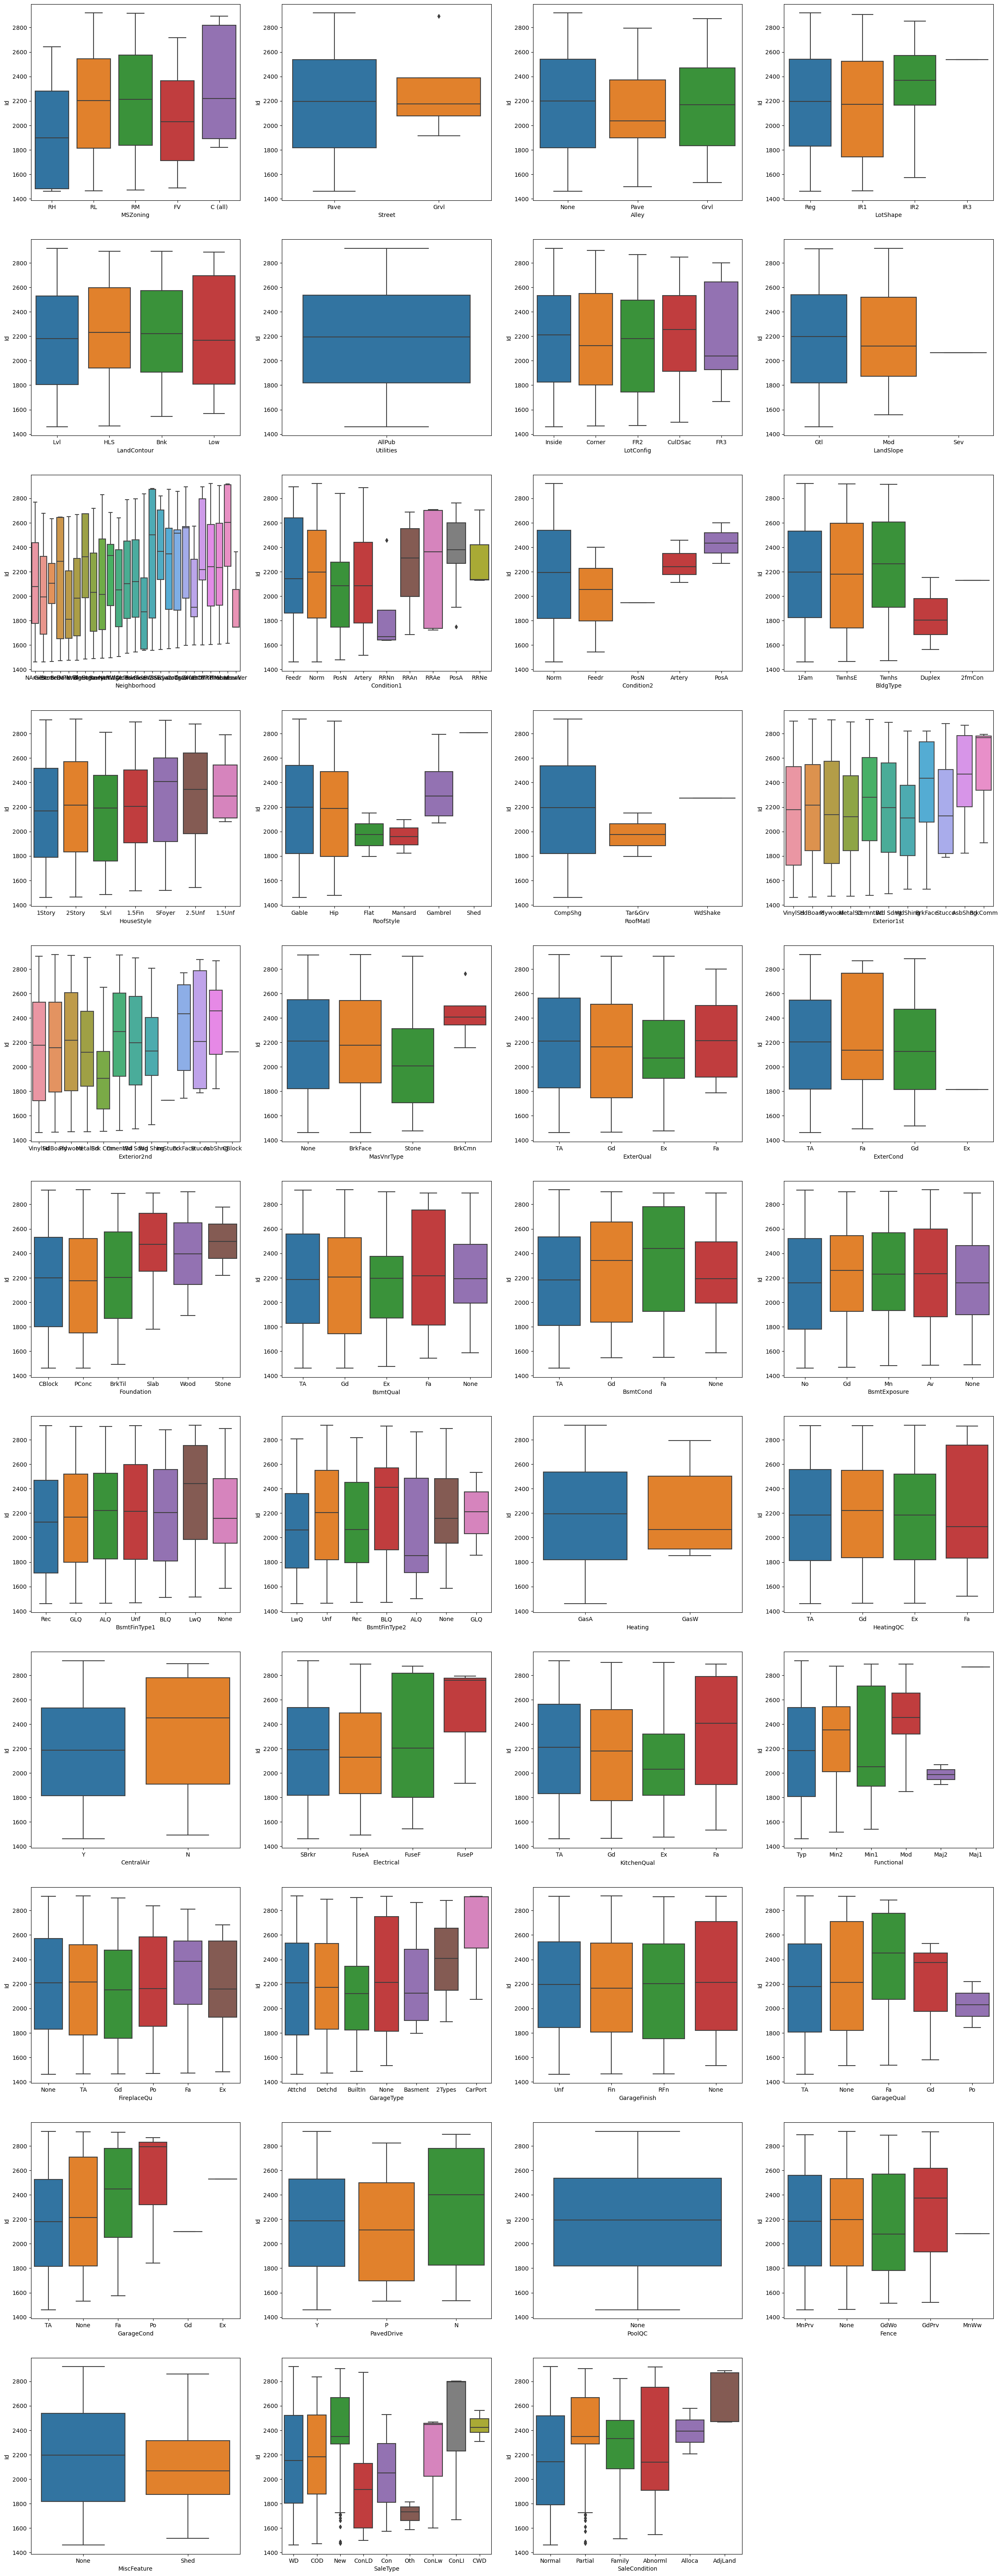

In [86]:
plt.figure(figsize=(30,80))
x1 = 1
for i in cat:
    plt.subplot(11,4,x1)    # 11 rows and 4 columns
    sns.boxplot(df1[i],df1['Id'])
    x1 = x1+1

In [87]:
X = df1.drop(['Id'],axis=1)
Y = df1['Id']

In [88]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
2,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
3,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal
4,60,RL,75.0,10000,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,160,RM,21.0,1533,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,12,2006,WD,Abnorml
1015,160,RM,21.0,1526,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,None,0,6,2006,WD,Normal
1016,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
1017,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml


In [89]:
Y

0       1461
1       1463
2       1464
3       1465
4       1466
        ... 
1014    2913
1015    2914
1016    2915
1017    2916
1018    2919
Name: Id, Length: 1019, dtype: int64

In [90]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(X[imp_con_columns1])
X1 = pd.DataFrame(array,columns=imp_con_columns1)
X1

,YrSold,MoSold
0,1.0,0.454545
1,1.0,0.181818
2,1.0,0.454545
3,1.0,0.000000
4,1.0,0.272727
...,...,...
1014,0.0,1.000000
1015,0.0,0.454545
1016,0.0,0.454545
1017,0.0,0.272727


In [95]:
X2=pd.get_dummies(X[cat])
X2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1015,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1016,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1017,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [97]:
Xnew=X1.join(X2)
Xnew

,YrSold,MoSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.454545,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,0.181818,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,0.454545,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,0.000000,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1.0,0.272727,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0.0,1.000000,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1015,0.0,0.454545,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1016,0.0,0.454545,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1017,0.0,0.272727,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

In [100]:
xtrain.shape

(764, 235)

In [101]:
# OlS regression model
from statsmodels.api import OLS,add_constant

# ypred = m1x1 + m2x2 + m3x3 + ..... mnxn + c

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Id   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     502.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:54:30   Log-Likelihood:                -3763.4
No. Observations:                 764   AIC:                             7895.
Df Residuals:                     580   BIC:                             8748.
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   219.6361      4.006     54.824      0.000     211.768     227.504
YrSold                -1253.7413      5.086   -246.505      0.000   -1263.731   -1243.752
MoSold                  -18.6604      6.618     -2.819      0.005     -31.659      -5.662
MSZoning_C (all)         87.1723     21.345      4.084      0.000      45.249     129.096
MSZoning_FV              40.3295     13.611      2.963      0.003      13.596      67.062
MSZoning_RH               5.3877     18.904      0.285      0.776     -31.741      42.517
MSZoning_RL              32.9589      8.516      3.870      0.000      16.233      49.685
MSZoning_RM              53.7877      9.707      5.541      0.000      34.723      72.852
Street_Grvl             132.3648     16.537      8.004      0.000      99.886     164.844
Street_Pave              87.2713     15.205      5.740      0.000      57.408     117.134
Alley_Grvl               66.8969      8.514      7.857      0.000      50.175      83.619
Alley_None               69.4301      5.552     12.505      0.000      58.525      80.335
Alley_Pave               83.3090      8.375      9.947      0.000      66.860      99.759
LotShape_IR1             48.5017     10.855      4.468      0.000      27.182      69.821
LotShape_IR2             55.7674     13.743      4.058      0.000      28.775      82.760
LotShape_IR3             71.5394     31.266      2.288      0.022      10.131     132.948
LotShape_Reg             43.8275     10.905      4.019      0.000      22.409      65.246
LandContour_Bnk          48.9616      8.860      5.526      0.000      31.560      66.363
LandContour_HLS          59.7945      8.132      7.353      0.000      43.822      75.767
LandContour_Low          67.6479     11.578      5.843      0.000      44.908      90.388
LandContour_Lvl          43.2320      6.011      7.192      0.000      31.426      55.039
Utilities_AllPub        219.6361      4.006     54.824      0.000     211.768     227.504
LotConfig_Corner         47.6958      5.728      8.327      0.000      36.446      58.946
LotConfig_CulDSac        36.2810      8.097      4.481      0.000      20.379      52.183
LotConfig_FR2            45.6537      9.077      5.029      0.000      27.825      63.482
LotConfig_FR3            45.5815     16.419      2.776      0.006      13.334      77.829
LotConfig_Inside         44.4241      5.011      8.865      0.000      34.582      54.266
LandSlope_Gtl           117.0275      5.680     20.603      0.000     105.872     128.184
LandSlope_Mod           102.6085      6.024     17.034      0.000      90.777     114.440
LandSlope_Sev          1.809e-13   8.72e-14      2.074      0.039    9.56e-15    3.52e-13
Neighborhood_Blmngtn    -75.3250     14.892     -5.058      0.000    -104.575     -46.075
Neighborhood_Blueste   

In [102]:
ols.pvalues.sort_values()

YrSold                  0.000000e+00
Utilities_AllPub       1.334860e-231
const                  1.334860e-231
PoolQC_None            1.334860e-231
CentralAir_N            1.979630e-78
                           ...      
Exterior1st_Wd Sdng     9.935586e-01
Exterior2nd_HdBoard     9.950821e-01
Exterior2nd_ImStucc     9.958973e-01
Exterior1st_Stucco      9.958990e-01
GarageCond_Gd                    NaN
Length: 236, dtype: float64

In [103]:
ols.pvalues.sort_values().index

Index(['YrSold', 'Utilities_AllPub', 'const', 'PoolQC_None', 'CentralAir_N',
       'LandSlope_Gtl', 'CentralAir_Y', 'MiscFeature_Shed', 'MiscFeature_None',
       'LandSlope_Mod',
       ...
       'Condition1_RRNn', 'RoofStyle_Mansard', 'Condition1_RRAe',
       'BldgType_2fmCon', 'Exterior1st_BrkFace', 'Exterior1st_Wd Sdng',
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior1st_Stucco',
       'GarageCond_Gd'],
      dtype='object', length=236)

In [104]:
ols.rsquared_adj

0.9917523020777447

In [105]:
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9918, 'GarageCond_Gd')

In [106]:
Xnew = Xnew.drop(col_to_drop,axis=1)   # Drop the column '2ndFlrSF'

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

xconst = add_constant(xtrain,has_constant='add')
ols = OLS(ytrain,xconst).fit()
rsq = round(ols.rsquared_adj,4)
col_to_drop = ols.pvalues.sort_values().index[-1]
rsq,col_to_drop

(0.9918, 'Exterior1st_Stucco')

In [107]:
r = []
for i in range(0,150,1):
    Xnew = Xnew.drop(col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)
    xconst = add_constant(xtrain,has_constant='add')
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if col_to_drop == 'const':
        col_to_drop = ols.pvalues.sort_values().index[-2]
    r.append(rsq)

In [108]:
Xnew

,YrSold,MoSold,MSZoning_C (all),MSZoning_RM,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Lvl,Utilities_AllPub,...,GarageType_Basment,GarageType_BuiltIn,GarageType_None,GarageFinish_RFn,GarageQual_Po,GarageQual_TA,GarageCond_Po,PavedDrive_Y,Fence_MnPrv,SaleCondition_AdjLand
0,1.0,0.454545,0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,1,0
1,1.0,0.181818,0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,1,0
2,1.0,0.454545,0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
3,1.0,0.000000,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
4,1.0,0.272727,0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0.0,1.000000,0,1,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1015,0.0,0.454545,0,1,1,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1016,0.0,0.454545,0,1,1,0,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1017,0.0,0.272727,0,1,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0


In [109]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [110]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 32.59031862745098
Mean_squared_error: 1811.7807100183823
R_squared: 0.9894360434937042
Adj_R2: 0.9842162061611816


In [111]:
ridge_model = Ridge()   # alpha=1.0
ridge_model.fit(xtrain,ytrain)

Ridge()

In [112]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 33.22063829453953
Mean_squared_error: 1779.8073937081574
R_squared: 0.989622470427712
Adj_R2: 0.9844947499331697


In [113]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 27.82871263904684
Mean_squared_error: 1282.154361789378
R_squared: 0.992771373025527
Adj_R2: 0.9918771098946644


In [126]:
Q = ridge_model.predict(xtest)
Q

array([2356.43950585, 2821.66601879, 2089.75650926, 2836.33392811,
       2096.84087481, 1779.13221227, 1780.87847268, 2514.35550359,
       2839.24511993, 2827.27871814, 1693.05810524, 2455.80517657,
       1628.75068642, 2119.2995604 , 2828.36365326, 2234.29238221,
       2189.23722248, 2136.31640706, 1722.82399383, 2815.08757469,
       1831.35929839, 2500.18403406, 1469.24292727, 2204.42948776,
       2303.06410095, 2421.57864141, 2634.33782844, 2200.57518743,
       2324.69784222, 2811.84863031, 2581.10093261, 2721.90151672,
       2570.56396105, 2195.87284636, 1982.96087827, 2392.35700559,
       2220.41178856, 2407.56284568, 2325.00931218, 1985.13892377,
       2407.43373305, 2041.30375006, 1733.98497548, 2380.95098425,
       2202.31996629, 2538.47993218, 1680.65153109, 1875.69634948,
       2749.25498096, 2360.7447409 , 1686.08515041, 2611.12072864,
       2500.18294631, 2224.75527341, 1748.09766849, 1402.78839593,
       2518.16567462, 2749.17578503, 2344.13698256, 1838.34589

In [127]:
sub_1 = pd.DataFrame(Q)
sub_1

,0
0,2356.439506
1,2821.666019
2,2089.756509
3,2836.333928
4,2096.840875
...,...
250,2706.483396
251,2687.092839
252,2024.200546
253,1692.938425


In [128]:
sub_1.to_csv('Submissions.csv')